<a href="https://colab.research.google.com/github/isabellefps/mvp-analise-de-dados-e-boas-praticas/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP - Análise de Dados e Boas Práticas
##Aluna: Isabelle Fernandes Paixão da Silva

###Pós-Graduação: Ciência de Dados e Analytics


## 1. Definição do Problema
O dataset usado neste projeto será o **Consumer Behavior and Shopping Habits**, o objetivo é investigar o impacto de vários fatores, como sazonalidade, atributos dos itens (tamanho e cor) e atividades promocionais (descontos e códigos promocionais), nas decisões de compra dos clientes, se existem épocas específicas em que determinadas categorias de produtos apresentam melhor desempenho, se os atributos ou promoções de itens específicos influenciam significativamente os valores de compra e as avaliações dos clientes. Usando este conjunto de dados, será analisada a relação entre os dados demográficos do cliente (idade e sexo) e seu comportamento de compra, se existem categorias de produtos ou canais de compras específicos preferidos por determinadas faixas etárias, ou sexo e como essas informações podem ser aproveitadas para projetar estratégias de marketing mais direcionadas. Para mais informações, consulte: https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/

**Informações sobre os atributos:**

1. **Customer ID:** Um identificador único atribuído a cada cliente individual, facilitando o rastreamento e análise de seu comportamento de compras ao longo do tempo.

2. **Age:** A idade do cliente, fornecendo informações demográficas para segmentação e estratégias de marketing direcionadas.

3. **Gender:** A identificação de gênero do cliente, uma variável demográfica chave que influencia as preferências de produtos e padrões de compra.

4. **Item Purchased:** O produto ou item específico selecionado pelo cliente durante a transação.

5. **Category:** A classificação ampla ou grupo ao qual o item adquirido pertence (por exemplo, roupas, eletrônicos, mantimentos).

6. **Purchase Amount (USD):** O valor monetário da transação, expresso em Dólares Americanos (USD), indica o custo do(s) item(ns) adquirido(s).

7. **Location:** A localização geográfica onde a compra foi realizada, fornecendo insights sobre preferências regionais e tendências de mercado.

8. **Size:** A especificação de tamanho (se aplicável) do item comprado, relevante para roupas, calçados e certos bens de consumo.

9. **Color:** A variante de cor ou escolha associada ao item comprado, influenciando as preferências do cliente e a disponibilidade do produto.

10. **Season:** A relevância sazonal do item comprado (por exemplo, primavera, verão, outono, inverno), impactando a gestão de estoque e estratégias de marketing.

11. **Review Rating:** Uma avaliação numérica ou qualitativa fornecida pelo cliente em relação à sua satisfação com o item comprado.

12. **Subscription Status:** Indica se o cliente optou por um serviço de assinatura, fornecendo insights sobre seu nível de fidelidade e potencial para receitas recorrentes.

13. **Shipping Type:** Especifica o método utilizado para entregar o item comprado (por exemplo, envio padrão, entrega expressa), influenciando os prazos e custos de entrega.

14. **Discount Applied:** Indica se foram aplicados descontos promocionais à compra, proporcionando insights sobre a sensibilidade ao preço e a eficácia das promoções.

15. **Promo Code Used:** Registra se um código promocional ou cupom foi utilizado durante a transação, auxiliando na avaliação do sucesso da campanha de marketing.

16. **Previous Purchases:** Fornece informações sobre o número ou frequência de compras anteriores feitas pelo cliente, contribuindo para estratégias de segmentação e retenção de clientes.

17. **Payment Method:** Especifica o modo de pagamento utilizado pelo cliente (por exemplo, cartão de crédito, dinheiro), fornecendo insights sobre as opções de pagamento preferidas.

18. **Frequency of Purchases:** Indica com que frequência o cliente se envolve em atividades de compra, uma métrica fundamental para avaliar a fidelidade do cliente e o valor vitalício.

In [2]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [6]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings('ignore')

##2. Carga de Dados
Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv





In [12]:
dataset = pd.read_csv ('https://raw.githubusercontent.com/isabellefps/mvp-analise-de-dados-e-boas-praticas/main/Shopping_behaviour.csv')

In [8]:
dataset.head (2) # duas primeiras linhas do dataset

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly


##3. Análise de Dados

###3.1. Estatísticas Descritivas

Verificando as dimensões do dataset, suas informações e alguns exemplos de linhas

In [9]:
# Dimensões do dataset
print(dataset.shape)

(3900, 18)


In [10]:
# Informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [11]:
# 10 primeiras linhas do dataset
dataset.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [12]:
# 10 últimas linhas do dataset
dataset.tail(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3890,3891,35,Female,Shirt,Clothing,81,Nebraska,XL,Green,Winter,2.6,No,Standard,No,No,33,Debit Card,Annually
3891,3892,36,Female,Dress,Clothing,30,Colorado,L,Peach,Winter,4.7,No,Free Shipping,No,No,6,Bank Transfer,Quarterly
3892,3893,35,Female,Jewelry,Accessories,86,Michigan,L,Indigo,Summer,3.5,No,Standard,No,No,5,PayPal,Fortnightly
3893,3894,21,Female,Hat,Accessories,64,Massachusetts,L,White,Fall,3.3,No,Store Pickup,No,No,29,Bank Transfer,Bi-Weekly
3894,3895,66,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [13]:
# Verificando o tipo de cada atributo do dataset
dataset.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [14]:
# Resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### 3.2. Visualizações


Através de gráficos, vamos analisar o impacto de diversos fatores nas decisões de compra dos clientes, tais como sazonalidade, gênero e atributos dos itens como tamanho e cor e atividades promocionais - incluindo descontos e códigos promocionais.

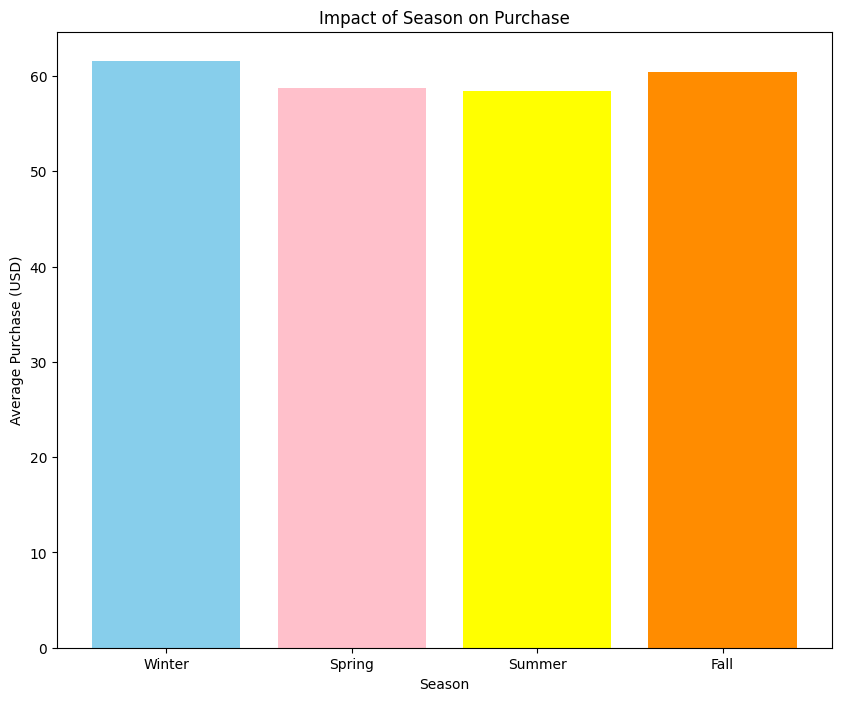

In [14]:
# Gráfico de barras para comparar total gasto em compras em cada estação do ano
seasons = dataset['Season'].unique()
average_purchase_by_season = dataset.groupby('Season')['Purchase Amount (USD)'].mean()

# Adicionando legendas e título ao gráfico
plt.figure(figsize=(10, 8))
plt.bar(seasons, average_purchase_by_season, color=['skyblue', 'pink', 'yellow', 'darkorange'])
plt.title("Impact of Season on Purchase")
plt.xlabel("Season")
plt.ylabel("Average Purchase (USD)")

# Exibindo o gráfico
plt.show()

No gráfico acima é analisado o **Impacto das compras por estação do ano**. Podemos observar que as estações Winter e Fall foram as estações onde consumidores gastaram mais se comparado a Spring e Summer. Sendo: Winter = Inverno, Spring = Primavera, Summer = Verão, Fall = Outono.





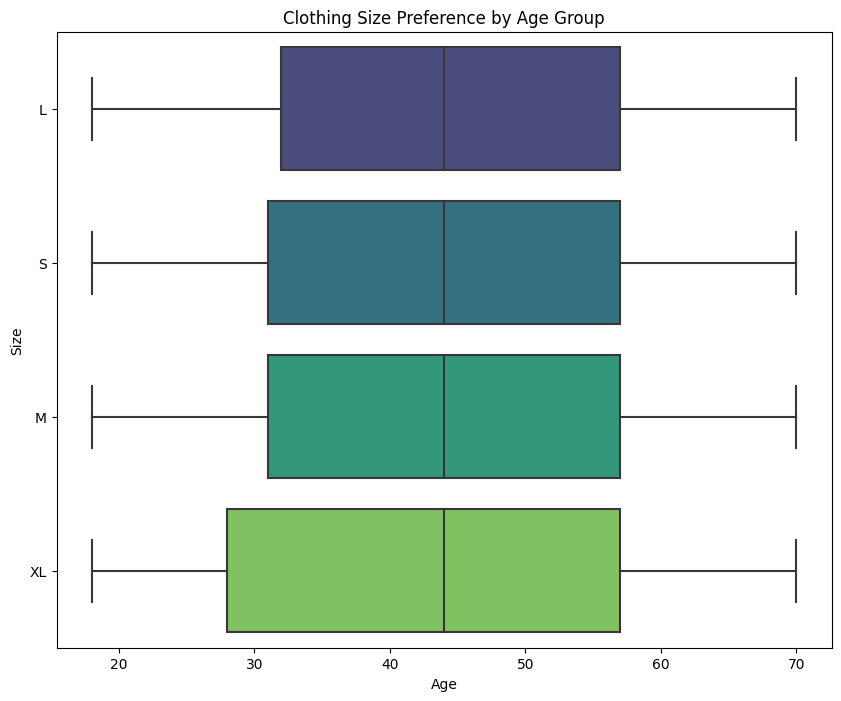

In [16]:
# Boxplot para comparar os tamanhos das roupas em diferentes faixas etárias
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Age', y='Size', data=dataset, palette='viridis')

# Adicionando legendas e título ao gráfico
plt.xlabel('Age')
plt.ylabel('Size')
plt.title('Clothing Size Preference by Age Group')

# Exibindo o gráfico
plt.show()

O boxplot **Clothing Size Preference by Age Group** representa a distribuição dos tamanhos de roupas em diferentes faixas etárias. Isso permite identificar as preferências em relação aos tamanhos com base na idade dos consumidores.

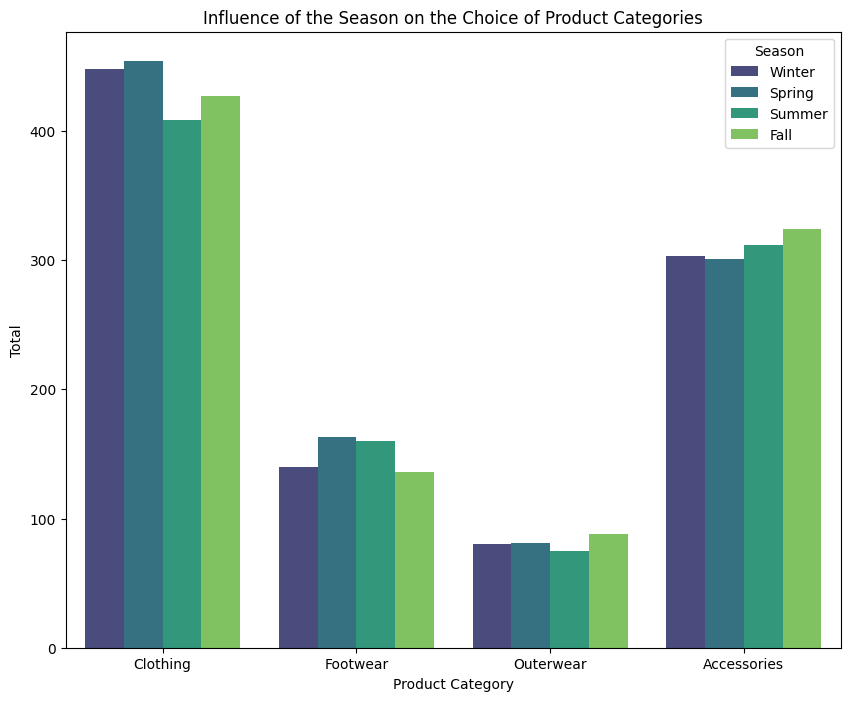

In [17]:
# Gráfico de barras empilhadas para comparar a escolha de categorias de produtos em diferentes estações do ano
plt.figure(figsize=(10, 8))
sns.countplot(x='Category', hue='Season', data=dataset, palette='viridis')

# Adicionando legendas e título ao gráfico
plt.xlabel('Product Category')
plt.ylabel('Total')
plt.title('Influence of the Season on the Choice of Product Categories')

# Adicionando legenda
plt.legend(title='Season')

# Exibindo o gráfico
plt.show()

O gráfico de barras agrupadas **Influence of the Season on the Choice of Product Categories**, onde cada barra representa a contagem de escolha de categorias de produtos em diferentes estações, permite a visualização de variações nas preferências de categorias de produtos conforme a estação do ano.

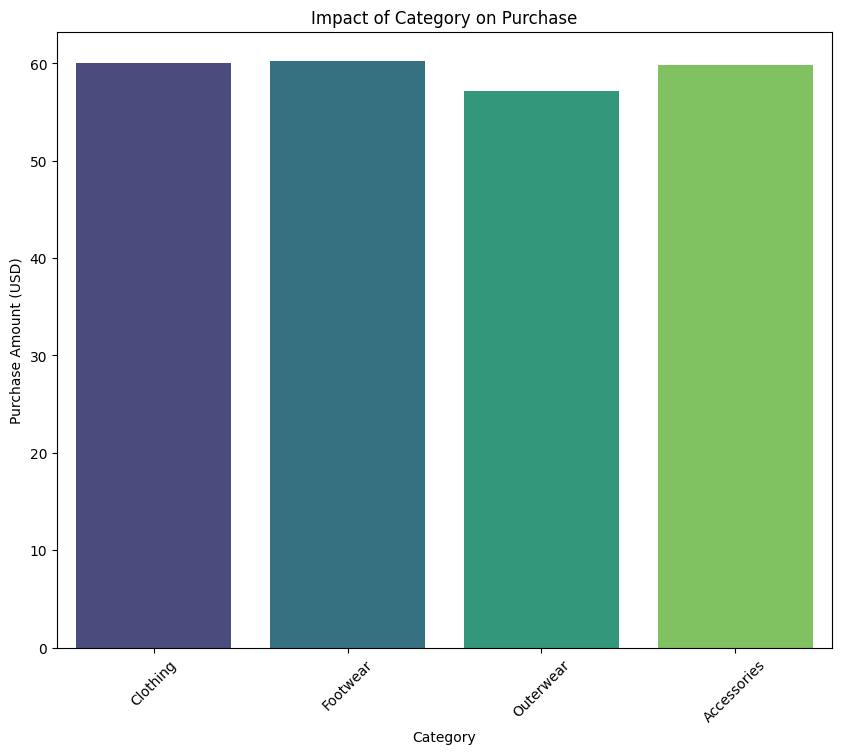

In [18]:
# Gráfico de barras para demostrar a categoria com maior gasto por parte dos consumidores
plt.figure(figsize=(10, 8))
sns.barplot(x='Category', y='Purchase Amount (USD)', data=dataset, ci=None, palette='viridis')
plt.title("Impact of Category on Purchase")
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

O gráfico de barras **Impact of Category on Purchase** revela que a categoria Outerwear apresenta uma ligeira desvantagem em comparação com as demais categorias.

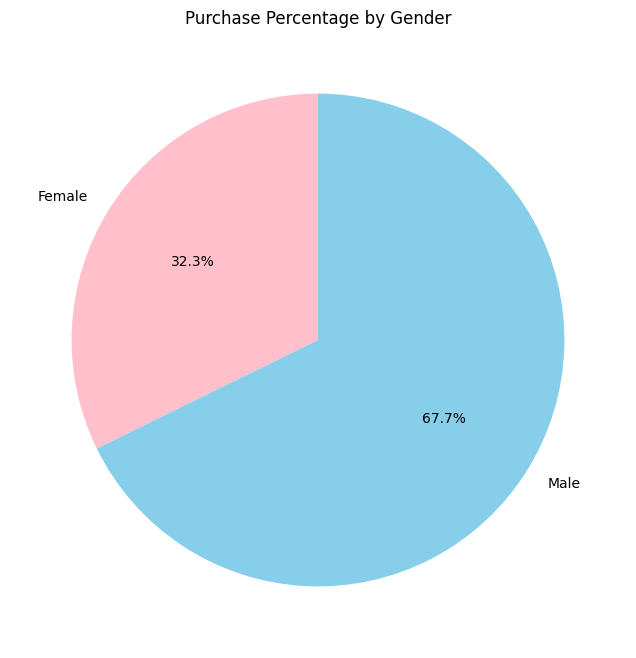

In [19]:
# Calculando o total de compras por gênero
total_compras_por_genero = dataset.groupby('Gender')['Purchase Amount (USD)'].sum()

# Calculando o percentual de compra por gênero
percentual_compra_por_genero = total_compras_por_genero / total_compras_por_genero.sum() * 100

# Criando um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(percentual_compra_por_genero, labels=percentual_compra_por_genero.index, autopct='%1.1f%%', startangle=90, colors=['pink', 'skyblue'])

# Adicionando o título
plt.title('Purchase Percentage by Gender')

# Exibindo o gráfico
plt.show()

O gráfico pizza **Purchase Percentage by Gender** demonstra que os homens têm maior probabilidade de gastar (67%), enquanto as mulheres têm menos probabilidade de gastar (32%).

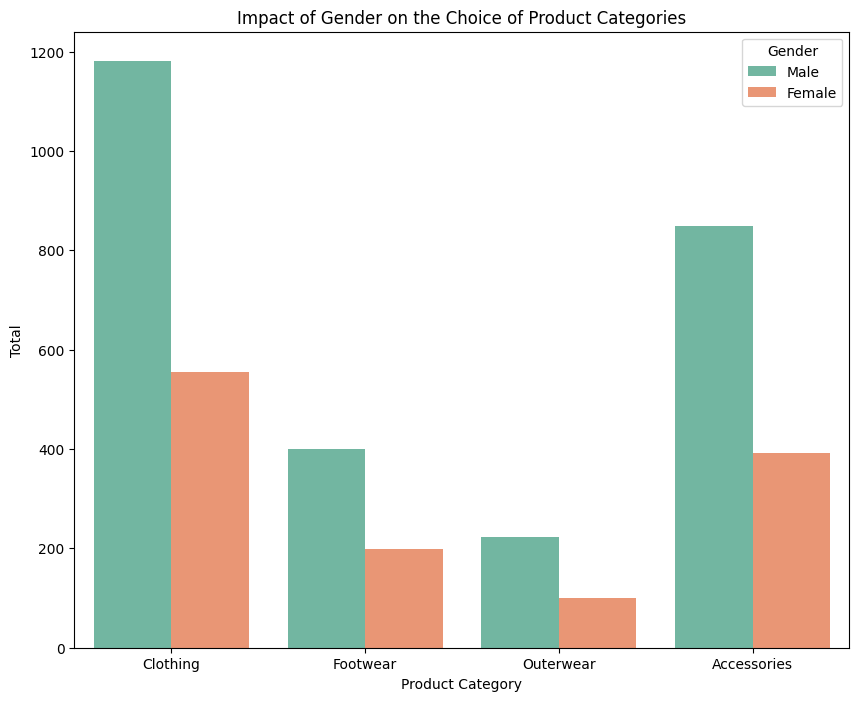

In [20]:
# Criando um gráfico de barras empilhadas para comparar a escolha de categorias de produtos com base no gênero
plt.figure(figsize=(10, 8))
sns.countplot(x='Category', hue='Gender', data=dataset, palette='Set2')

# Adicionando legendas e título ao gráfico
plt.xlabel('Product Category')
plt.ylabel('Total')
plt.title('Impact of Gender on the Choice of Product Categories')

# Adicionando uma legenda
plt.legend(title='Gender')

# Exibindo o gráfico
plt.show()

O gráfico de barras agrupadas **Impact of Gender on the Choice of Product Categories**, onde cada barra representa a contagem de escolha de categorias de produtos com base no gênero dos consumidores, demonstra como as preferências de categorias variam entre os gêneros. Os homens consomem mais que as mulheres em todas as categorias.

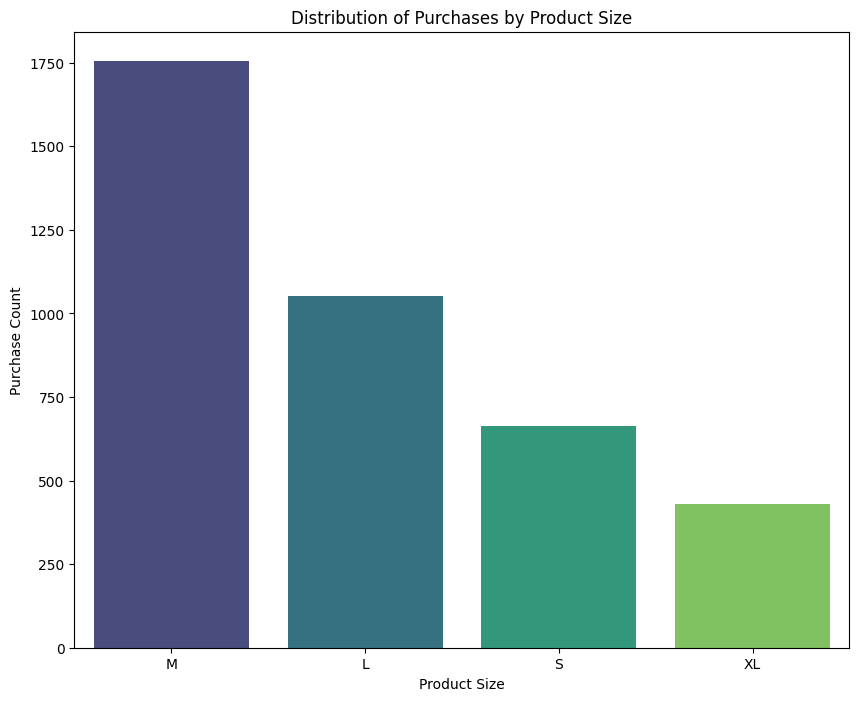

In [33]:
# Calculando a contagem de compras por tamanho do produto
contagem_por_tamanho = dataset['Size'].value_counts()

# Criando um gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x=contagem_por_tamanho.index, y=contagem_por_tamanho.values, palette='viridis')

# Adicionanando rótulos e título ao gráfico
plt.xlabel('Product Size')
plt.ylabel('Purchase Count')
plt.title('Distribution of Purchases by Product Size')

# Exibindo o gráfico
plt.show()

O gráfico de barras **Distribution of Purchases by Product Size**, onde cada barra representa a contagem de compras para cada tamanho do produto, demonstra que produtos do tamanho M tem maior busca pelos consumidores.

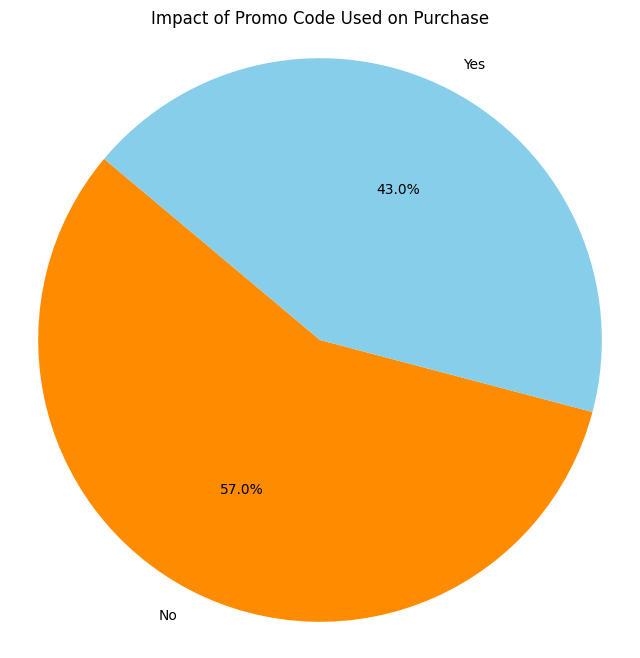

In [31]:
Promo_counts = dataset['Promo Code Used'].value_counts()

# Criando um gráfico pizza
plt.figure(figsize=(8, 8))
plt.pie(promo_counts, labels=promo_counts.index, autopct='%1.1f%%', startangle=140, colors=['darkorange', 'skyblue'])
plt.title("Impact of Promo Code Used on Purchase")
plt.axis('equal')
plt.show()

O gráfico pizza **Impact of Promo Code Used on Purchase**, demostra que não há grande impacto de códigos promocionais nas compras dos consumidores.

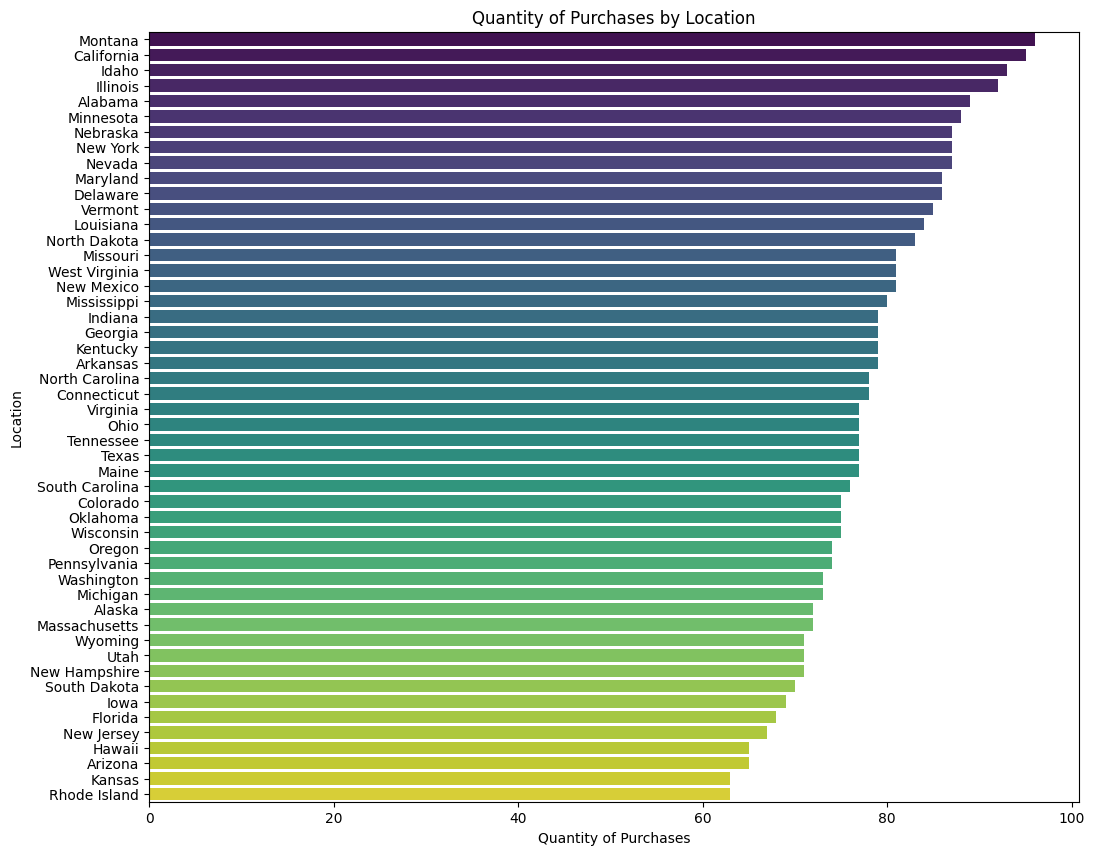

In [46]:
# Calculando a contagem de compras por localização
contagem_por_localizacao = dataset['Location'].value_counts()

# Criando um gráfico de barras horizontal
plt.figure(figsize=(12, 10))
sns.barplot(x=contagem_por_localizacao.values, y=contagem_por_localizacao.index, palette='viridis')

# Adicionando legendas e título ao gráfico
plt.xlabel('Quantity of Purchases')
plt.ylabel('Location')
plt.title('Quantity of Purchases by Location')

# Exibindo o gráfico
plt.show()

O gráfico **Quantity of Purchases by Location**, visa informar os estados com maior número de compras. Montana e Califórnia se destacam pela maior quantidade de clientes.

<Figure size 1200x800 with 0 Axes>

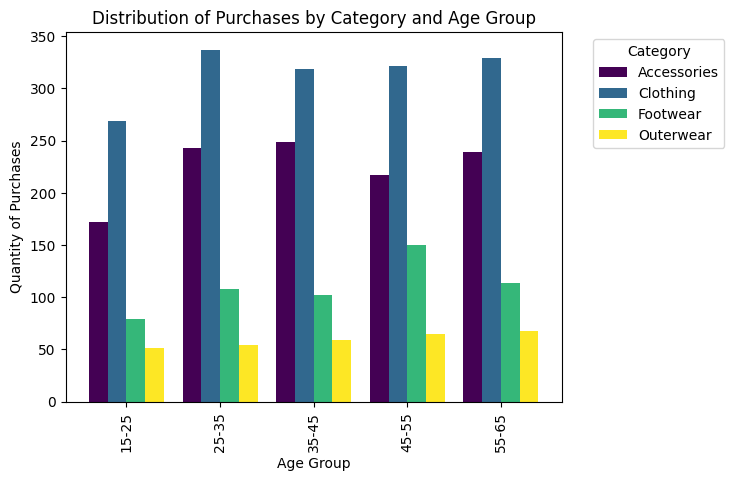

In [51]:
# Definindo os grupos de idade
faixas_etarias = [15, 25, 35, 45, 55, 65]

# Criando uma nova coluna 'Faixa Etária' com base nas faixas especificadas
dataset['Faixa Etária'] = pd.cut(dataset['Age'], bins=faixas_etarias, labels=[f'{i}-{j}' for i, j in zip(faixas_etarias, faixas_etarias[1:])])

# Calculando a contagem de compras por categoria e faixa etária
contagem_por_categoria_e_idade = dataset.groupby(['Faixa Etária', 'Category']).size().unstack().fillna(0)

# Criando um gráfico de barras agrupado
plt.figure(figsize=(12, 8))
contagem_por_categoria_e_idade.plot(kind='bar', width=0.8, colormap='viridis')

# Adicionando legendas e título ao gráfico
plt.xlabel('Age Group')
plt.ylabel('Quantity of Purchases')
plt.title('Distribution of Purchases by Category and Age Group')

# Exibir o gráfico
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

No gráfico **Distribution of Purchases by Category and Age Group**, foi criado grupos de idade (15, 25, 35, 45, 55, 65), onde cada grupo de barras representa a quantidade de compras para cada categoria, dividida por faixa etária. Todas as faixas etárias tem quantidade de consumo parecida, exceto o grupo 15-25, que demostra menos poder de compra se comparado aos outros.

##4. Pré-Processamento de Dados

###4.1. Tratamento de Missings e Limpeza

Nesta etapa será realizado o tratamento de missings e limpeza

In [53]:
dataset.isnull().sum() # Número de valores nulos em cada coluna

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Payment Method              0
Frequency of Purchases      0
Faixa Etária              355
dtype: int64

In [55]:
dataset.dropna(inplace=True) # Para eliminar o valor nulo acima

In [57]:
dataset.isnull().sum()  # Confirmando que os nulos foram deletados

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
Faixa Etária              0
dtype: int64

In [59]:
# Verificando duplicados
value=len(dataset[dataset.duplicated()])
print(value)

0


In [65]:
# Classificação de acordo com avaliações de revisão para ter uma ideia da qualidade do produto adquirido
bins = [0, 2, 4, 5]
labels = ['bad', 'medium', 'good']

# Criando uma nova coluna 'Reviews' baseada na classificação
dataset['Reviews'] = pd.cut(dataset['Review Rating'], bins=bins, labels=labels, include_lowest=True)


print(dataset)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  ...  \
0                        53       Kentucky    L       Gray  Winter  ...   
1                        64          Maine    L     Maroon  Winter  ...   
2                        73  M

<Axes: >

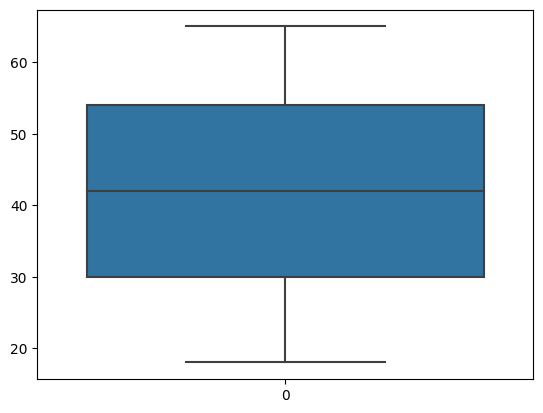

In [61]:
# Boxplot para verificar a distribuição dos dados
sns.boxplot(dataset['Age'])

In [62]:
# Calculando IQR para identificar outliers
Q1 = dataset['Age'].quantile(0.25)
Q3 = dataset['Age'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites  para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificando outliers
outliers = (dataset[(dataset['Age'] < lower_bound) | (dataset['Age'] > upper_bound)])
# Print the outliers
print("Outliers:")
print(outliers)
outliers = ((dataset['Age'] < lower_bound) | (dataset['Age'] > upper_bound))

dataset=dataset[~outliers]
print(dataset)

Outliers:
Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases, Faixa Etária, reviews]
Index: []
      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear 

### 4.2 Normalização:
Transformar os dados para que sejam dimensionados entre 0 e 1.

In [63]:
# Normalizando a coluna Previous Purchase para obter a coluna Customer Retention Rate
from sklearn.preprocessing import MinMaxScaler

# Criando MinMaxScaler
scaler = MinMaxScaler()

# Ajustando e transformando os dados
dataset['Customer Retention Rate'] = scaler.fit_transform(dataset[['Previous Purchases']])*100
print(dataset)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  ...  \
0                        53       Kentucky    L       Gray  Winter  ...   
1                        64          Maine    L     Maroon  Winter  ...   
2                        73  M

In [64]:
# Verifcando novamente as 10 primeiras linhas do dataset
dataset.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Faixa Etária,reviews,Customer Retention Rate
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,45-55,medium,26.530612
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Express,Yes,Yes,2,Cash,Fortnightly,15-25,medium,2.040816
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,45-55,medium,44.897959
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,15-25,medium,97.959184
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,35-45,medium,61.224490
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,...,Yes,Standard,Yes,Yes,14,Venmo,Weekly,45-55,medium,26.530612
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,...,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly,55-65,medium,97.959184
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,...,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly,25-35,medium,36.734694
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,...,Yes,Express,Yes,Yes,8,Venmo,Annually,25-35,medium,14.285714
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,...,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly,55-65,good,6.122449


##Conclusão

Neste MVP, utilizando a base de dados **Consumer Behavior and Shopping Habits**, foi possível analisar o comportamento do cliente e os dados de compra revelaram uma série de insights valiosos. Ficou evidente que variações sazonais, categorias de produtos, gênero, tamanho e a utilização de códigos promocionais desempenham papéis cruciais na tomada de decisões de compra por parte dos clientes. Além disso, os dados apontam para a robustez do mercado consumidor em Montana, destacando-o como um ponto forte.

Destaca-se também que o segmento de vestuário emerge como a categoria de produto preferida em todas as faixas etárias, consolidando-se como uma escolha unânime entre os consumidores. Essas descobertas não apenas proporcionam uma compreensão mais profunda do cenário atual, mas também oferecem insights estratégicos valiosos.

Tais informações são fundamentais para orientar estratégias de marketing mais eficazes, aprimorar ofertas de produtos e planejar promoções direcionadas. A capacidade de adaptar-se às preferências específicas de diferentes segmentos de clientes torna-se crucial para o sucesso, e essas descobertas fornecem uma base sólida para direcionar iniciativas e maximizar a satisfação do cliente.